### Data analysis
Data analysis is the process of studying large amounts of data, analyzing it to identify patterns, obtaining actionable insights, and using that insight to make decisions. Data analysis can help you find objective and unbiased information that can support your intuition or judgement. Intuition is subjective and based on your experience, knowledge, wisdom or feelings. Intuition can also help you ask the right questions, generate hypotheses, interpret data and make sense of complex situations. Data analysis and intuition are not mutually exclusive, but complementary. Finding the right balance between them can help you make better decisions

In [4]:
# We often use pandas and numpy libraries to analyze data 
# in simple ways, but we also need to make statistical 
# operations. So we also use scipy.stats
# We could also want to understand visually the data, for that we use the 
# pyplot library module from matplotib.
import pandas as pd, numpy as np, scipy.stats as ss, matplotlib.pyplot as plt

### Problem Set 1
#### Ex 1 

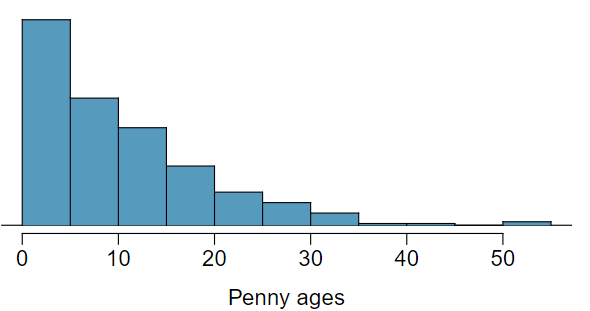

This is a unimodal distribution. It means that it only has one local maximum. Or That the local and global maximum are the same. It has a peak in between 0 and 5 years for a penny's age. 

- If the graph is symmetrical (the left and right sides are mirror images of each other), then the mean, median and mode are all equal and located at the center of the graph .

- If the graph is skewed (one tail is longer than the other), then the mean is pulled towards the longer tail, while the median is closer to the peak of the graph. The mode is usually at the peak of the graph.

- If there are multiple peaks in a graph (bimodal or multimodal), then there can be more than one mode. The mean and median may not coincide with any of the modes.

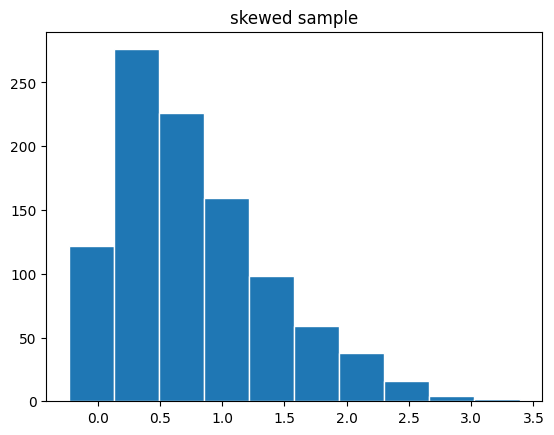

0.9682404369414582


In [6]:
# I am going to prove that by making different histogram distribution plots

a = 10 # change this as needed, positive values for right skewness
sample_size = 1000 # change this as needed
skewedSample = ss.skewnorm.rvs(a, size=sample_size)
plt.hist(skewedSample, edgecolor = 'white')
plt.title('skewed sample')
plt.show()
print(ss.skew(skewedSample)) # check the skewness of the sample

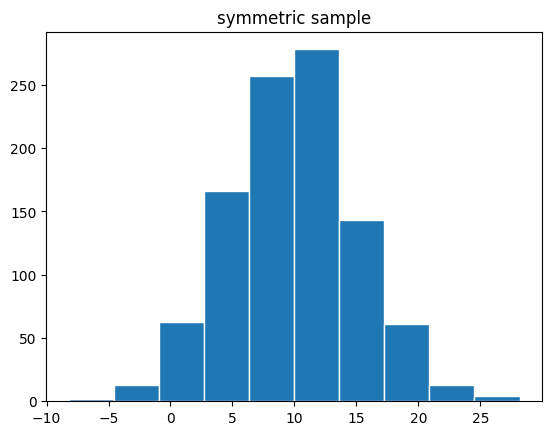

Mean 9.86 | Median 9.963819928105988 | Mode ModeResult(mode=array([-8.21901038]), count=array([1]))


C:\Users\rbelt\AppData\Local\Temp\ipykernel_12532\3029901493.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(f"""Mean {np.mean(symmetricSample):.2f} | Median {np.median(symmetricSample)} | Mode {ss.mode(symmetricSample)}""")


In [7]:
symmetricSample = ss.norm.rvs(10, 5, sample_size)
plt.hist(symmetricSample, edgecolor = 'white')
plt.title('symmetric sample')
plt.show()
print(f"""Mean {np.mean(symmetricSample):.2f} | Median {np.median(symmetricSample)} | Mode {ss.mode(symmetricSample)}""")

In [13]:
# This function ahould calculate any parameter from the CLT equation
# import numpy as np

def central_limit_theorem(mu, sigma, n, x_bar=None):
    """
    Calculates a parameter from the central limit theorem equation.
    
    Parameters:
    mu (float): The population mean.
    sigma (float): The population standard deviation.
    n (int): The sample size.
    x_bar (float): The sample mean. If None, the sample mean is not used.
    
    Returns:
    float: The calculated parameter.
    """
    if x_bar is None:
        # Calculate the mean of the sampling distribution
        return mu
    else:
        # Calculate the standard error of the sampling distribution
        std_error = sigma / np.sqrt(n)
        
        # Calculate the z-score
        z = (x_bar - mu) / std_error
        
        # Calculate the parameter
        return mu + z * std_error

# Example usage
mu = 10.44
sigma = 9.2
n = 100
x_bar = None

sample_mean = central_limit_theorem(mu, sigma, n, x_bar)
print("Sample mean:", sample_mean)

Sample mean: 10.44


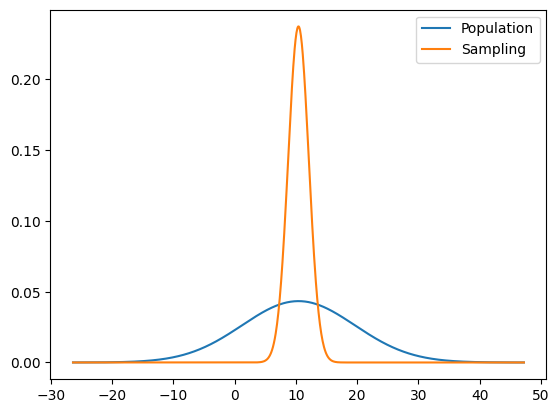

In [19]:
# Function that plots population and sampling distributions on 
# the same scale
# import numpy as np
# import matplotlib.pyplot as plt

def plot_distributions(mu, sigma, n):
    """
    Plots the population and sampling distributions on the same scale.
    
    Parameters:
    mu (float): The population mean.
    sigma (float): The population standard deviation.
    n (int): The sample size.
    """
    # Generate a random sample from the population
    sample = np.random.normal(mu, sigma, n)

    # Define the x-axis range
    x_min = mu - 4 * sigma
    x_max = mu + 4 * sigma
    x = np.linspace(x_min, x_max, 1000)

    # Calculate the population and sampling distributions
    population = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    sampling = 1 / (sigma / np.sqrt(n) * np.sqrt(2 * np.pi)) * np.exp(-(x - mu) ** 2 / (2 * (sigma / np.sqrt(n)) ** 2))

    # Plot the distributions
    plt.plot(x, population, label="Population")
    plt.plot(x, sampling, label="Sampling")
    plt.legend()
    plt.show()

# Example usage
mu = 10.44
sigma = 9.2
n = 30

plot_distributions(mu, sigma, n)

These are the formulas that BingChat used for the population and sampling distributions
$$population = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 \sigma^2}}$$

$$sampling = \frac{1}{\sigma / \sqrt{n} \sqrt{2 \pi}} e^{-\frac{(x - \mu)^2}{2 (\frac{\sigma}{\sqrt{n}})^2}}$$

https://www.scribbr.com/statistics/normal-distribution/

It is important to note that there are limitation to estimate probabilities of skewed distributions if they are not nearly normal

#### Ex 5
We use the probability operation of sum and multiplication of probabilites for X1 and X2 for the excercise 5 of the first Problem Set, each combination of X1 and X2 would give a different value for T0

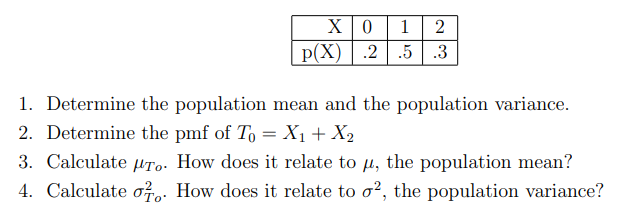

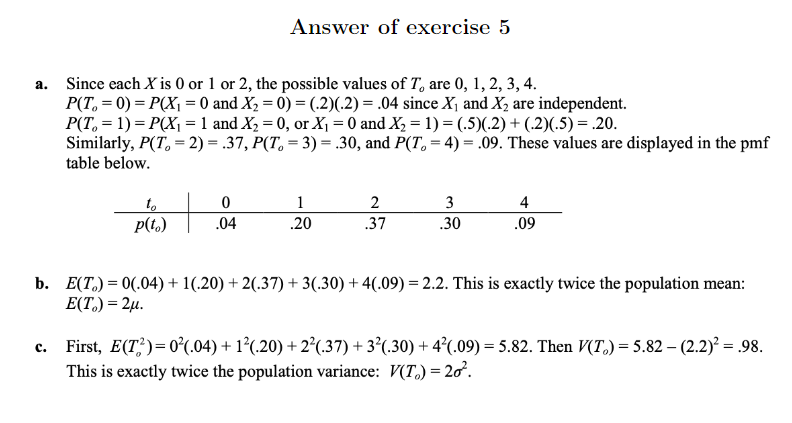

#### Ex 6
Almost no idea besides what BingChat said. calculating a specific probability from a binomial distribution.

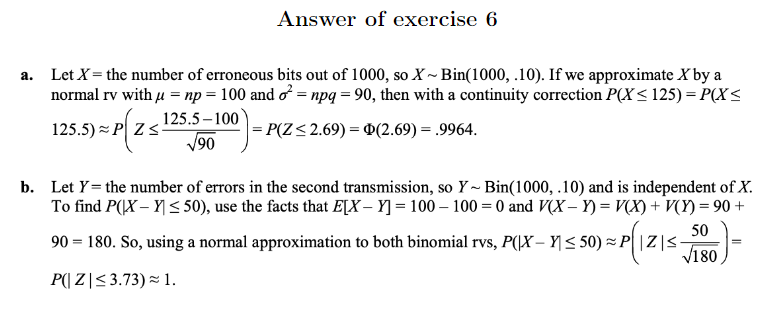

In [29]:
from scipy.stats import binom

def prob_at_most_k_errors(n, p, k):
    """Calculate the probability that at most k transmission errors occur."""
    # Use the continuity correction
    return binom.cdf(k + 0.5, n, p)

n = 1000
p = 0.1
k = 125

prob = prob_at_most_k_errors(n, p, k)
print(f"""The probability that at most {k}
transmission errors occur is approximately {prob:.4f}""")

# Which is actually pretty similar to the result in the answer sheet 0.9964

The probability that at most 125
transmission errors occur is approximately 0.9955


In [34]:
from scipy.stats import norm

def prob_second_plane_not_catch_up(mu_X, sigma_X, mu_Y, sigma_Y, time):
    """Calculate the probability that the second plane has not caught up to the first plane after `time` hours of flying."""
    # Calculate the mean and variance of X - Y
    mu = (mu_X - mu_Y) * time
    var = (sigma_X**2 + sigma_Y**2) * time
    
    # Calculate the standard deviation of X - Y
    sd = var**0.5
    
    # Calculate the standardized value of 0
    z = -mu / sd
    
    # Calculate the probability that Z > z
    return norm.sf(z)

mu_X = 520
sigma_X = 10
mu_Y = 500
sigma_Y = 10
time = 2

prob = prob_second_plane_not_catch_up(mu_X, sigma_X, mu_Y, sigma_Y, time)
print(f"""The probability that the second plane has not caught 
up to the first plane after {time} hours of flying is approximately {prob:.4f}""")

The probability that the second plane has not caught 
up to the first plane after 2 hours of flying is approximately 0.9772


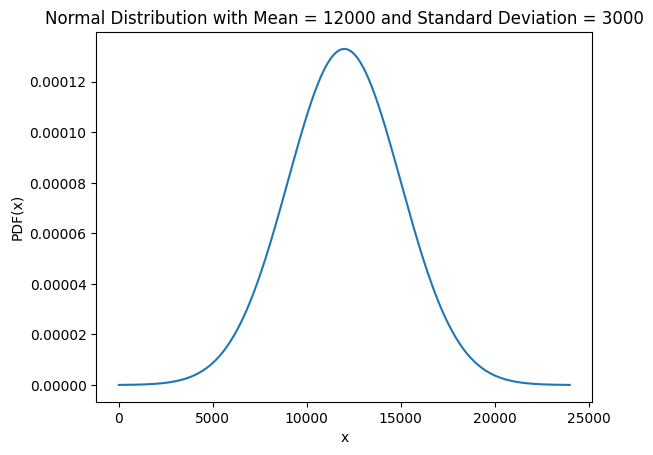

(<class 'numpy.ndarray'>, {<class 'numpy.ndarray'>})


In [9]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution(mean, std_dev):
    # Generate x-axis values
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

    # Generate y-axis values
    y = norm.pdf(x, mean, std_dev)

    # Plot the normal distribution
    plt.plot(x, y)

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('PDF(x)')
    plt.title('Normal Distribution with Mean = {} and Standard Deviation = {}'.format(mean, std_dev))

    # Show the plot
    plt.show()

    print(f"{type(x), {type(y)}}")

plot_normal_distribution(12000, 3000)

ModuleNotFoundError: No module named 'plot_normal_distribution'

In [42]:
from scipy.stats import chi2

n = 501
xbar = 28.5
s = 8.3
alpha = 0.05
df = n - 1

lower = (n - 1) * s**2 / chi2.ppf(1 - alpha / 2, df)
upper = (n - 1) * s**2 / chi2.ppf(alpha / 2, df)

print("The 95% confidence interval estimate of the population variance is [{:.2f}, {:.2f}]".format(lower, upper))

The 95% confidence interval estimate of the population variance is [61.09, 78.30]


In [38]:
import numpy as np
from scipy.stats import norm

mean = 12000
std_dev = 3000
n = 85
x = 1000000

z = (x - n * mean) / (std_dev * np.sqrt(n))
p = 1 - norm.cdf(z)

print("The probability that the Government collects at least $1,000,000 is approximately {:.2%}".format(p))

The probability that the Government collects at least $1,000,000 is approximately 76.52%


In [41]:

x = np.array([152, 115, 109, 94, 88, 137, 152, 77, 160, 165, 125, 40, 128, 123, 136, 101, 62, 153, 83, 69])

n = len(x)
xbar = np.mean(x)
s2 = np.var(x, ddof=1)

a = (n * s2) / (n * s2 - 2 * np.sum((x - xbar)**2))
b = xbar / a

print("a = {:.2f}, b = {:.2f}".format(a, b))

a = -1.11, b = -102.11


In [51]:
import numpy as np

data = [152, 115, 109, 94, 88, 137, 152, 77, 160, 165, 125, 40, 128, 123, 136, 101, 62, 153, 83, 69]

mean = np.mean(data)
variance = np.var(data, ddof=1)
a = variance / mean
b = mean / a
print("a =", round(a, 2))
print("b =", round(b, 2))

a = 11.29
b = 10.05


In [43]:
import math

std_dev = 15
sample_size = 100
standard_error = std_dev / (sample_size ** 0.5)
print("The standard error of the mean is", round(standard_error, 2), "minutes.")

The standard error of the mean is 1.5 minutes.


In [45]:
import scipy.stats as st

mean = 20
std_dev = 15
sample_size = 100
standard_error = std_dev / (sample_size ** 0.5)
z_score_1 = (18 - mean) / standard_error
z_score_2 = (22 - mean) / standard_error
prob = st.norm.cdf(z_score_2) - st.norm.cdf(z_score_1)
print("The probability is approximately", round(prob, 4))

The probability is approximately 0.8176


In [52]:
data = [152, 115, 109, 94, 88, 137, 152, 77, 160, 165, 125, 40, 128, 
        123, 136, 101, 62, 153, 83, 69]

mean = np.mean(data)
second_moment = np.mean([x ** 2 for x in data])
a = (second_moment / mean) - mean
b = mean / a
print("a =", round(a, 2))
print("b =", round(b, 2))

a = 10.73
b = 10.58


In [60]:
import scipy.stats as stats
p_rural = 0.45
p_suburban_urban = 0.60
n_rural = 200
n_suburban_urban = 300

p = ((p_rural * n_rural) + (p_suburban_urban * n_suburban_urban)) / (n_rural + n_suburban_urban)
k = 250
binom = stats.binom(n_rural + n_suburban_urban, p)
prob = 1 - binom.cdf(k - 1)
print("The approximate probability that at least 250 of these voters favor this candidate is", prob)

The approximate probability that at least 250 of these voters favor this candidate is 0.9669216379077975


In [59]:
n = n_rural + n_suburban_urban
mean = n * p
print("The mean of the number of voters who favor a particular gubernatorial candidate is", round(mean, 2))

The mean of the number of voters who favor a particular gubernatorial candidate is 270.0


In [61]:
variance = n * p * (1 - p)
std_dev = variance ** 0.5
print("The standard deviation of the number of voters who favor a particular gubernatorial candidate is", round(std_dev, 2))

The standard deviation of the number of voters who favor a particular gubernatorial candidate is 11.14


In [66]:
import pandas as pd
import scipy.stats as stats

filename = "canadian_salaries.xlsx"
df = pd.read_excel(filename)

years_of_education = df['education']
n = len(years_of_education)
mean = years_of_education.mean()
std_dev = years_of_education.std(ddof=1)
t_value = stats.t.ppf(0.975, n - 1)
margin_of_error = t_value * std_dev / (n ** 0.5)
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("The 95% confidence interval for the average years of education of Canadian workers is", confidence_interval)
print(margin_of_error)
print(standard_error)

The 95% confidence interval for the average years of education of Canadian workers is (13.242712353917518, 13.431378441166505)
0.09433304362449312
1.5
